In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image_dir = "aloes/"
N = 5
D = 70
img_left = cv2.imread(image_dir + "aloeL.jpg", cv2.IMREAD_GRAYSCALE)
img_right = cv2.imread(image_dir + "aloeR.jpg", cv2.IMREAD_GRAYSCALE)

In [3]:
def census_transform(image, image2):
    Y, X = image.shape[:2]
    census = np.zeros((Y, X))
    for y in range(N, Y-N):
        for x in range(D+N, X-D-N):
            patch = image[y-N//2:y+N//2+1, x-N//2:x+N//2+1]
            central = patch[N//2, N//2]
            patch_binary = np.where(patch > central, 1, 0)
            best_d = float('inf')
            best_val = 0
            for d in range(-D, 0, 1):
                patch2 = image2[y-N//2:y+N//2+1, x-N//2+d:x+N//2+d+1]
                central2 = patch2[N//2, N//2]
                patch2_binary = np.where(patch2 > central2, 1, 0)
                d_1 = np.sum(np.bitwise_xor(patch_binary, patch2_binary))
                if d_1 < best_d:
                    best_d = d_1
                    best_val = -d
            census[y, x] = best_val
    return census

census = census_transform(img_left, img_right)

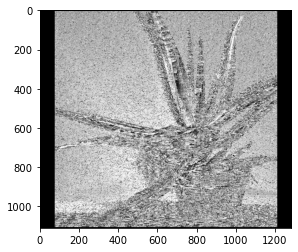

In [ ]:
plt.imshow(census, cmap='gray')